In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 7.3. Optimización de carteras I

- Descarga los datos del último año de algunos activos usando IEX. Denominamos $n$ como el número de activos elegidos.
- Crea un dataframe solo con los datos de cierre, tendrá dimensiones $m \times n$ con $m$ el número de días y $n$ en número de activos.
- Calcula un portfolio aleatorio:
   - Genera uno vector de pesos $\mathbf{w}$ aleatorios de dimensiones $n \times 1$, donde $n$ es el número de activos. Los pesos tienen que cumplir que  $w_i \ge 0, \; i = 1,\dots, n$ y $\sum_{i=1}^{n} w_i = 1$ dado que solo permitimos estar en largo.
   - Calcula el retorno y la desviacion típica del portfolio:
       - $R_p = \mathbf{w^T \mu}$ donde $\mathbf{\mu}$ es un vector con la media de los retornos diarios de los activos, con dimensiones $n \times 1$.
       - $\sigma_p = \sqrt{\mathbf{w}^T\Sigma \mathbf{w}}$, donde $\Sigma$ es la matriz de covarianzas de los retornos, con dimensiones $n \times n$
- Realiza una simulación de montecarlo para ello:
   - Repite el procceso anterior $k$ veces por ejemplo 10000, guardando los pesos $\mathbf{w}$, $R_p$ y $\sigma_p$ de cada experimento.
   - Realiza una figura con todos los puntos.
   - Selecciona el punto de máximo ratio sharpe:
     - Calcula el ratio sharpe para cada uno de los porfolios generados. El ratio sharpe se calcula como:
     \begin{equation*}
     S_p = \frac{R_p - R_f}{\sigma_p}
     \end{equation*}
     asumimos que $R_f$, el retorno del activo sin riesgo, es 0. 
     - Obtén el porfolio con el $S_p$ mayor.
     - Pinta este punto en la figura y obtén los pesos.
      
<center>
<img src="imgs/harry.jpeg"  alt="drawing" width="300"/>
<br />    Harry Markowitz, Novel 1990
</center>

  
   

### Descarga de datos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import requests


def get_time_series(ticker, close_only=True, range_days='5d'):
    url = f'https://cloud.iexapis.com/stable/stock/{ticker}/chart/{range_days}'
    r = requests.get(
        url,
        params={
            'token': 'sk_db27a586c5634056a8d96d7515029cb9',
            'chartCloseOnly': close_only,
        })
    df_resultado = pd.read_json(r.content)

    df_resultado = df_resultado.set_index('date')
    if close_only:  
        close_series = df_resultado.close
        return close_series
    return df_resultado

### Random porfolio

In [12]:
df = pd.DataFrame({
    'BRK.B': get_time_series('BRK.B', range_days='1y'),
    'TSLA': get_time_series('TSLA', range_days='1y'),
    'F': get_time_series('F', range_days='1y'),
    'AAPL': get_time_series('AAPL', range_days='1y'),
    'SPY': get_time_series('SPY', range_days='1y'),
})

In [13]:
df

,BRK.B,TSLA,F,AAPL,SPY
date,,,,,
2020-11-13,227.42,408.50,8.54,119.26,358.10
2020-11-16,233.10,408.09,8.80,120.30,362.57
2020-11-17,233.16,441.61,8.75,119.39,360.62
2020-11-18,230.07,486.64,8.82,118.03,356.28
2020-11-19,229.53,499.27,8.82,118.64,357.78
...,...,...,...,...,...
2021-11-08,288.80,1162.94,20.15,150.44,468.93
2021-11-09,286.35,1023.50,20.12,150.81,467.38
2021-11-10,285.32,1067.95,19.36,147.92,463.62


<AxesSubplot:xlabel='date'>

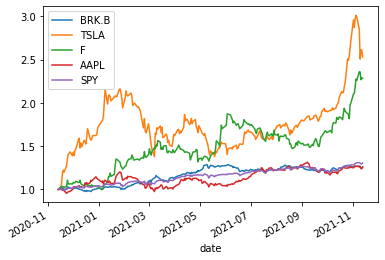

In [14]:
(df / df.iloc[0]).plot()

In [33]:
df.shape

(252, 5)

In [18]:
n = df.shape[1]

array([0.01852117, 0.10453439, 0.296036  , 0.3437724 , 0.23713604])

In [ ]:
- calcular retornos .pct_change
- calular la media de los retornos .mean()
- r_p ---> mat  ---> número
- std_p ---> mat. sqrt( w @ cov @ w   ) ---> número

In [48]:
r = df.pct_change()
cov = r.cov()
mu = r.mean()

In [98]:
n_sim = 10000

simul = pd.DataFrame(columns=['r_p', 'std_p', 'BRK.B', 'TSLA', 'F', 'AAPL', 'SPY'], index=range(n_sim))


for i in range(n_sim):
    w = np.random.uniform(size=n)
    w = w / w.sum()
    
    r_p = mu @ w
    std_p = np.sqrt(w @ cov @ w)

    simul.loc[i, 'r_p'] = r_p
    simul.loc[i, 'std_p'] = std_p
    simul.iloc[i, 2:] = w
    
simul['sharpe'] = simul.loc[:, 'r_p'] / simul.loc[:, 'std_p']

<AxesSubplot:xlabel='std_p', ylabel='r_p'>

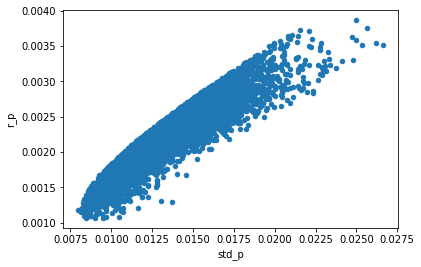

In [125]:
simul.plot.scatter(x='std_p',y='r_p')

In [107]:
simul.iloc[np.argmax(simul.r_p)]

r_p      0.003866
std_p    0.024984
BRK.B    0.038096
TSLA     0.637328
F        0.286011
AAPL     0.032018
SPY      0.006548
Name: 7164, dtype: object

In [111]:
r_port_sharpe = simul.iloc[np.argmax(simul.sharpe)]

In [117]:
r_port_sharpe

r_p       0.002169
std_p     0.011582
BRK.B     0.168923
TSLA      0.147607
F         0.247417
AAPL      0.009973
SPY        0.42608
sharpe    0.187301
Name: 4866, dtype: object

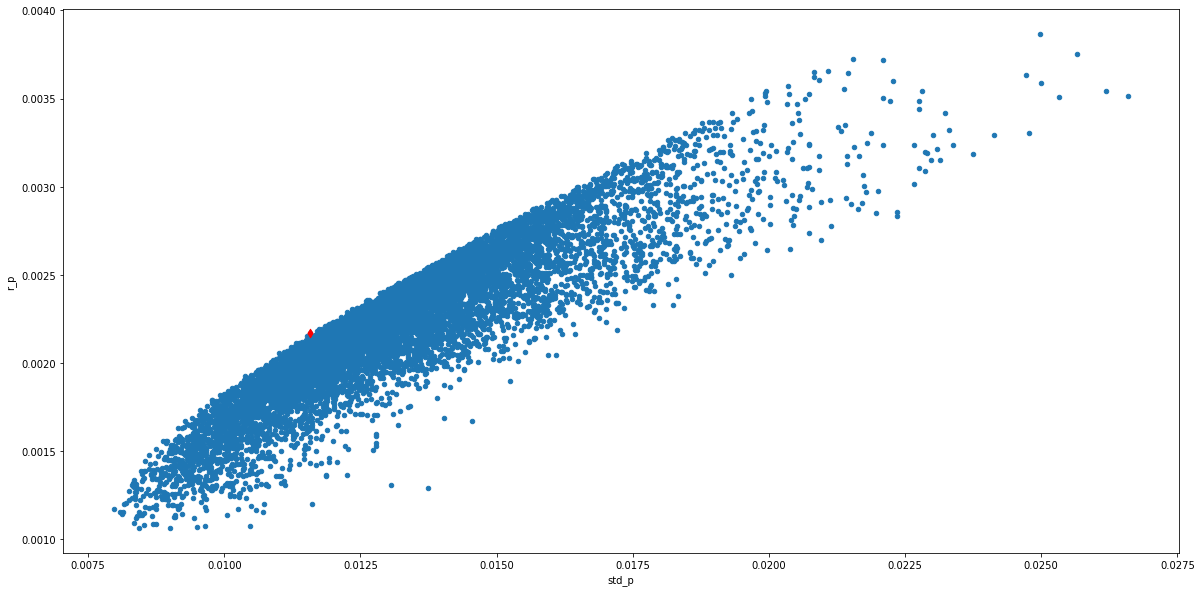

In [124]:
fig, ax = plt.subplots(figsize=(20,10))
simul.plot.scatter(x='std_p',y='r_p', ax=ax)
ax.scatter(x=r_port_sharpe['std_p'], y =r_port_sharpe['r_p'], marker='d', color='r')